# EDA DE ACCIDENTES EN LONDON 

Este es un proyecto personal en el cual, solo quiero enfocarme a realizar un EDA extenso que me permita sacar valor a mis datos. 

Este Data Set fue extraído de la página del gobierno de Londres, el cual indica, las principales razones de Injuries en el transporte público de Londres.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel("/content/LONDON.xlsx")

# Chapter 1

Como pasos iniciales vamos a indagar, que tipos de variables tengo, el shape de mis datos y la visualización de datos nulos. 

In [ ]:
df.shape

(23158, 12)

In [ ]:
df.dtypes

Year                                  int64
Date Of Incident             datetime64[ns]
Route                                object
Operator                             object
Group Name                           object
Bus Garage                           object
Borough                              object
Injury Result Description            object
Incident Event Type                  object
Victim Category                      object
Victims Sex                          object
Victims Age                          object
dtype: object

In [ ]:
df.isnull().sum()

Year                         0
Date Of Incident             0
Route                        0
Operator                     0
Group Name                   0
Bus Garage                   0
Borough                      0
Injury Result Description    0
Incident Event Type          0
Victim Category              0
Victims Sex                  0
Victims Age                  0
dtype: int64

In [ ]:
df.head(3)

,Year,Date Of Incident,Route,Operator,Group Name,Bus Garage,Borough,Injury Result Description,Incident Event Type,Victim Category,Victims Sex,Victims Age
0,2015,2015-01-01,1,London General,Go-Ahead,Garage Not Available,Southwark,Injuries treated on scene,Onboard Injuries,Passenger,Male,Child
1,2015,2015-01-01,4,Metroline,Metroline,Garage Not Available,Islington,Injuries treated on scene,Onboard Injuries,Passenger,Male,Unknown
2,2015,2015-01-01,5,East London,Stagecoach,Garage Not Available,Havering,Taken to Hospital – Reported Serious Injury or...,Onboard Injuries,Passenger,Male,Elderly


In [ ]:
df1=df[df["Victim Category"]=="Passenger"]
por=(df1["Victim Category"].value_counts().sum())/(df.shape[0])
print(f"El factor que respresenta los pasajeros en los accidentes es del {por:.2%}")

El factor que respresenta los pasajeros en los accidentes es del 81.30%


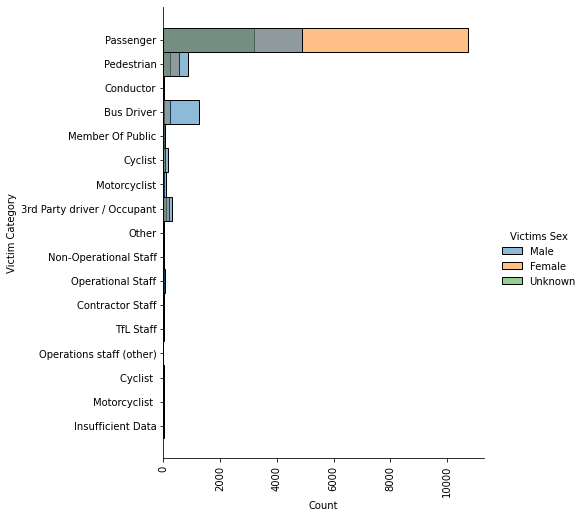

In [ ]:

sns.displot(data=df,y="Victim Category",hue=("Victims Sex"),height=7)
plt.xticks(rotation=90);

# Chapter 2 

Basándonos en la gráfica anterior y el porcentaje de accidentes correspondientes a pasajeros, decido seccionar mi data set para averiguar que está ocurriendo, y así analizar el 80% de los accidentes dentro del sistema público londinense. 

Dentro de esta sección averiguaré cuál es el sexo que más está incurriendo en accidentes y a razón de qué. 

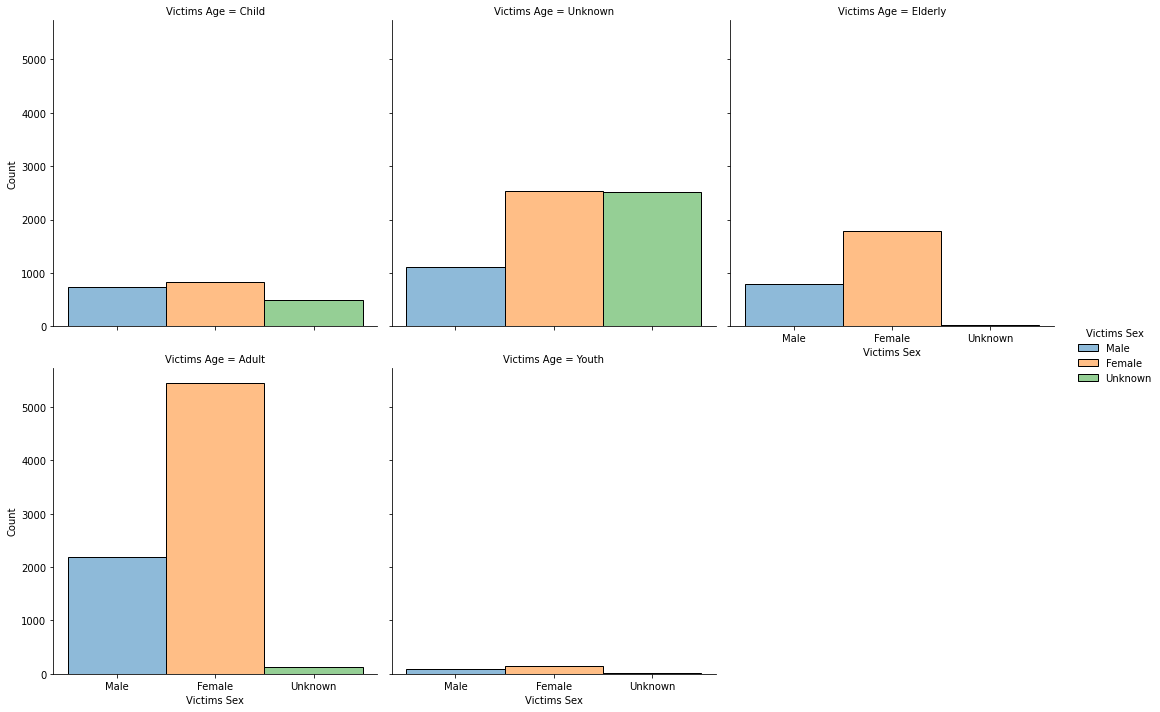

In [ ]:
g=sns.displot(data=df1,x="Victims Sex",hue="Victims Sex",col="Victims Age",col_wrap=3)


De la gráfica anterior ya podemos empezar a darle respuesta nuestra pregunta planteada en este capítulo. Donde son las mujeres las que más se accidentan dentro del sistema público londinense, concentrando su porcentaje en adultos.


In [ ]:
a=df1[df1["Victims Sex"]=="Unknown"]
a["Victims Sex"].value_counts().sum()

3176

In [ ]:
por2=(a["Victims Sex"].value_counts().sum())/(df1["Victims Sex"].value_counts().sum())
print(f'El porcentaje de Unknown sex que tengo en mi data set es de  {por2:.2%}')

El porcentaje de Unknown sex que tengo en mi data set es de  16.87%


Aquí nos enfrentamos a mi primera decisión. Ya observamos que tenemos registros sin definición de sexo, en un total de, 3176 datos que representan el 17% de la data. ¿Qué hago con ellos, los elimino o sigo mis análisis con ellos?

La decisión tomada es que vamos a continuar con ellos. Simplemente por la razón de que estos datos son personas que por alguna cuestión no se logró tomar su sexo, pero no dejan de ser datos valiosos para darle valor a la investigación

# CHAPTER 3 

En este capítulo, analizaremos en que operadores de buses se presentan la mayoría de accidentes y en que proporción por sexo, ya que estamos observando un considerable aporte de mujeres en estas estadísticas.

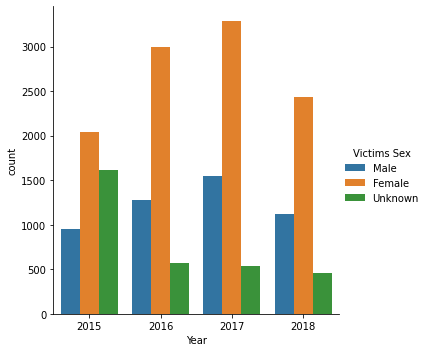

In [ ]:
sns.catplot(data=df1,x="Year",hue="Victims Sex",kind="count");


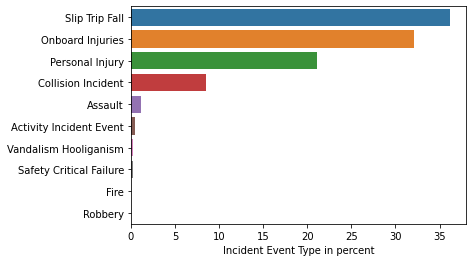

In [ ]:
z=pd.DataFrame(df1["Incident Event Type"].value_counts(normalize=True)*100)
sns.barplot(data=z,y=z.index,x="Incident Event Type")
plt.xlabel("Incident Event Type in percent");

In [ ]:
A=df1["Incident Event Type"].value_counts().head(4)

In [ ]:
df_iet=df1[df1["Incident Event Type"].isin(A.index)]

In [ ]:
por3=(df_iet["Incident Event Type"].value_counts().sum())/(df1["Incident Event Type"].value_counts().sum())
print(f'El porcentaje de INCIDENTES  que representan los 4 primeros datos  en mi datasat es de  {por3:.2%}')

El porcentaje de INCIDENTES  que representan los 4 primeros datos  en mi datasat es de  97.84%


En este apartado extraje las primeras 4 causas de los accidentes en el sistema público de Londres, que representan el 97.84% de mi data Sets de pasajeros. Cosa que vamos a analizar en que operador se presenta más para atacar este problema de raíz. 

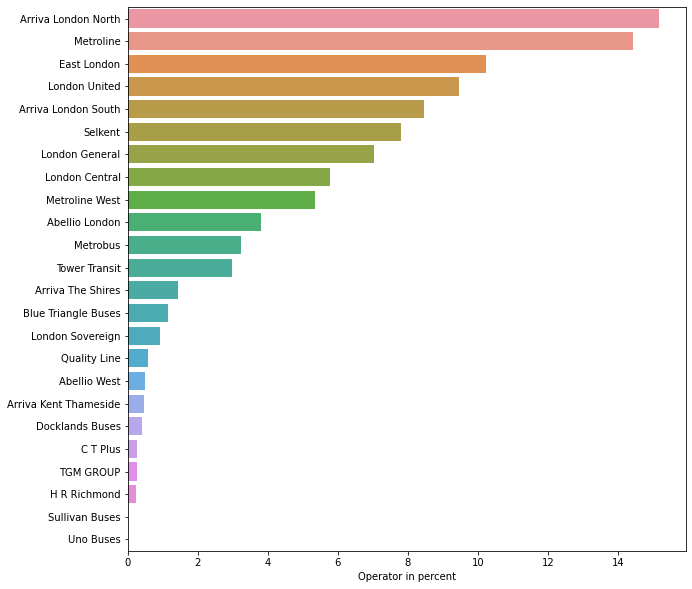

In [ ]:
OP=pd.DataFrame(df_iet["Operator"].value_counts(normalize=True)*100)
plt.figure(figsize=(10,10))
sns.barplot(data=OP,y=OP.index,x="Operator")
plt.xlabel("Operator in percent");

Como podemos observar la mayoría de incidentes se presentan en los 5 primeros operados de buses en Londres, a continuación lo segmentáremos por sexo para analizar a donde debemos atacar este problema.

In [ ]:
z=OP.sort_values("Operator",ascending=False).head(5).index.to_list()
df_final=df_iet[df_iet["Operator"].isin(z)]

In [ ]:
df_final["Incident Event Type"].value_counts()

Slip Trip Fall        3959
Onboard Injuries      3748
Personal Injury       2052
Collision Incident     872
Name: Incident Event Type, dtype: int64

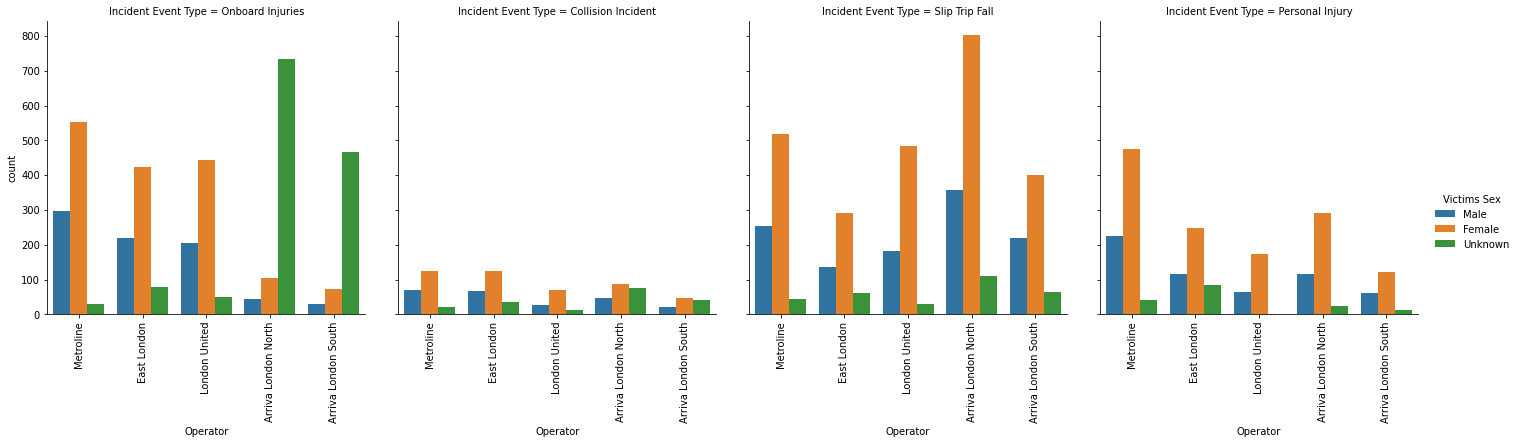

In [ ]:
g=sns.catplot(data=df_final,x="Operator",kind="count",hue="Victims Sex",col="Incident Event Type")
g.set_xticklabels(rotation=90)

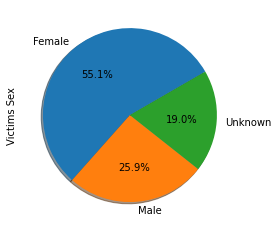

In [ ]:
F=(df_final["Victims Sex"].value_counts(normalize=True)*100).plot(kind="pie",autopct='%1.1f%%',shadow=True,startangle=30);


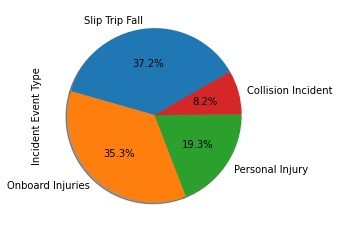

In [ ]:
iet=(df_final["Incident Event Type"].value_counts(normalize=True)*100).plot(kind="pie",autopct='%1.1f%%',shadow=True,startangle=30);

In [ ]:
df_final.shape[0]

10631

In [ ]:
df["Victims Sex"].value_counts(normalize=True)*100

Female     51.157267
Male       33.288712
Unknown    15.554020
Name: Victims Sex, dtype: float64

In [ ]:
Percent=(df_final["Victims Sex"].value_counts().sum())/(df["Victims Sex"].value_counts().sum())
print(f'EL porcentaje total de accidentes en pasajeros que recojen\nlas 5 principales lineas de autobuses en londres es de: {Percent:.2%}')

EL porcentaje total de accidentes en pasajeros que recojen
las 5 principales lineas de autobuses en londres es de: 45.91%


# Conclusión 

* Indudablemente,existe un factor a revisar en las principales operadoras de transporte público en Londres,ya que los resbalones y accidentes internos están representando el 70 % de mis datos en estas líneas.Como ingeniero considero,que deben implementarse ayudas mecánicas como pasamanos o cintas antideslizante en todos los buses de Londres para así disminuir considerablemente los accidentes que presenten en estos sin importar el sexo.
* Las mujeres en este data Set son las principales perjudicadas frente a los accidentes, cosa que debe mirarse con más profundidad y más detenimiento de como está ocurriendo estos accidentes y así atacarlos de forma directa. Cabe recalcar, que las mujeres representan el 51% de mis datos, cifra alarmante. Como sugerencia, se pueden instalar ayudas visuales para captar la atención de los usuarios y prevenir resbalones. 

NOTA: Los datos han presentado cierta inclinación hacia el sexo femenino. Una causa de este comportamiento, puede atribuirse a que los hombres no reportan los accidentes e incidentes que pueden incurrir en este sistema público. A razón de esto, se puede atribuir cierto sesgo a mis datos.